In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install statsmodels==0.12.0

     |████████████████████████████████| 9.5 MB 7.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
%cp /content/drive/MyDrive/CSVs/* ./

In [119]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [120]:
from pandas_datareader import data as pdr
from datetime import datetime

In [146]:
df = pd.read_csv('/content/IBM_stock.csv')

In [147]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,114.349998,112.419998,113.330002,113.669998,4982800.0,99.434967
1,2019-01-02,115.980003,111.690002,112.010002,115.209999,4239900.0,100.782135
2,2019-01-03,114.879997,112.690002,114.529999,112.910004,4346700.0,98.770157
3,2019-01-04,117.489998,114.440002,114.910004,117.320000,4477800.0,102.627876
4,2019-01-07,118.830002,116.669998,117.500000,118.150002,3751200.0,103.353943


In [148]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
248,2019-12-24,135.619995,134.610001,135.610001,134.979996,1202100.0,123.739563
249,2019-12-26,135.309998,134.649994,134.979996,134.910004,2129700.0,123.675400
250,2019-12-27,135.750000,134.869995,135.000000,135.270004,2752200.0,124.005402
251,2019-12-30,135.300003,132.500000,135.199997,132.809998,4118900.0,121.750267
252,2019-12-31,134.119995,132.399994,132.529999,134.039993,3777500.0,122.877831


#**Stock Return Analysis**

In [149]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [150]:
close = df['Close']
date_rng  =  pd.date_range(end='2019-12-31', periods=253, freq='B')

In [151]:
df=pd.DataFrame(close.values,columns=['Close'])
df['TimeIndex'] = pd.DataFrame(date_rng, columns=['B-Days'])

In [152]:
df

,Close,TimeIndex
0,113.669998,2019-01-11
1,115.209999,2019-01-14
2,112.910004,2019-01-15
3,117.320000,2019-01-16
4,118.150002,2019-01-17
...,...,...
248,134.979996,2019-12-25
249,134.910004,2019-12-26
250,135.270004,2019-12-27
251,132.809998,2019-12-30


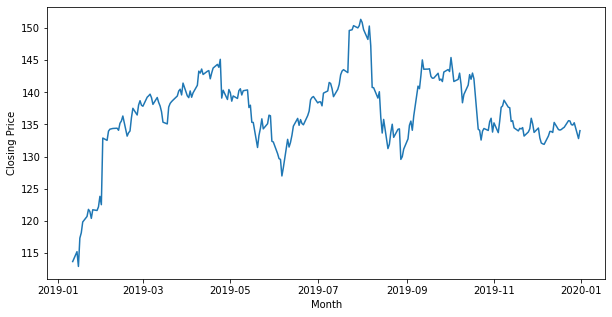

In [153]:
plt.figure(figsize=(10, 5))
plt.plot(df.TimeIndex, df.Close)
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.show()

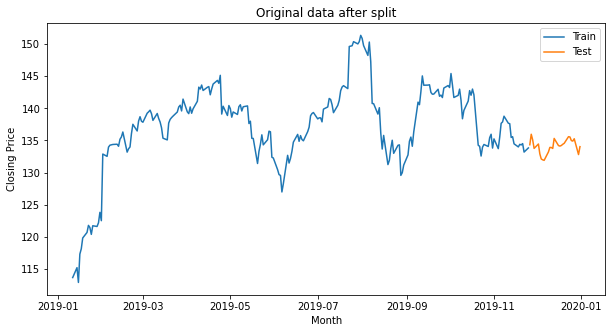

In [154]:
train = df[0:int(len(df)*0.9)] 
test= df[int(len(df)*0.9):]

plt.figure(figsize=(10, 5))
plt.plot(train.TimeIndex, train.Close, label = 'Train')
plt.plot(test.TimeIndex, test.Close,  label = 'Test')

plt.legend(loc = 'best')
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.title('Original data after split')
plt.show()

In [155]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [156]:
from sklearn.metrics import  mean_squared_error

In [157]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Close']))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


For alpha = 0.00,  RMSE is 20.4883 


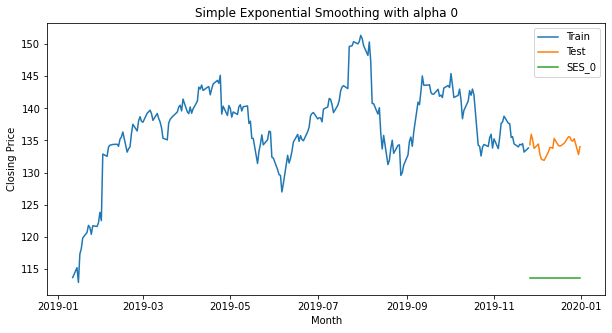

In [158]:
alpha_value = 0

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.10,  RMSE is 1.6639 


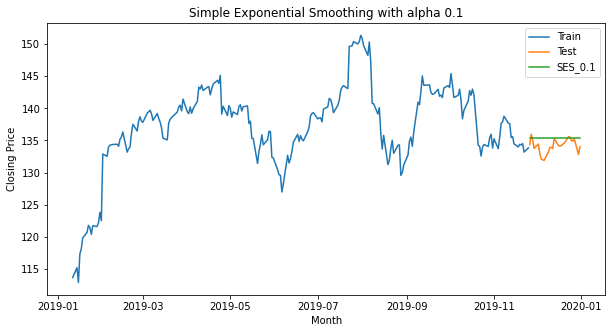

In [159]:
alpha_value = 0.1

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.50,  RMSE is 1.1287 


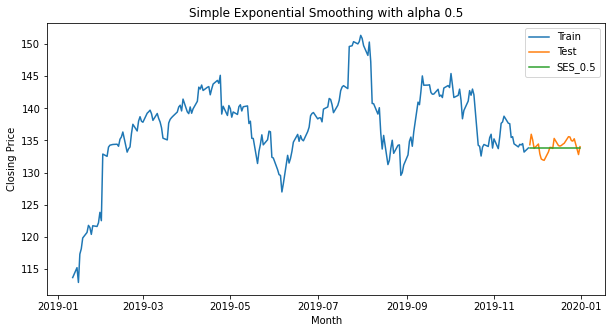

In [160]:
alpha_value = 0.5

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.90,  RMSE is 1.1420 


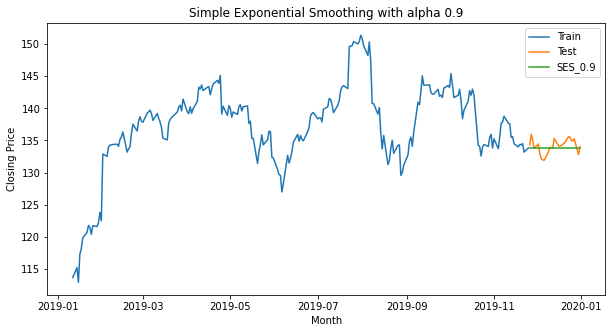

In [161]:
alpha_value = 0.9

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.99,  RMSE is 1.1295 


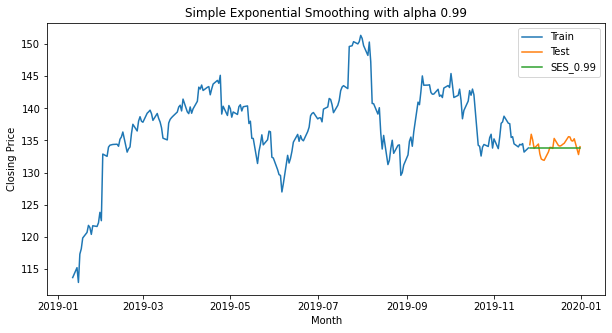

In [162]:
alpha_value = 0.99

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,



Simple Exponential Smoothing 


Smoothing Level 0.939
Initial Level 113.7564

For alpha = 0.94,  RMSE is 1.1371 


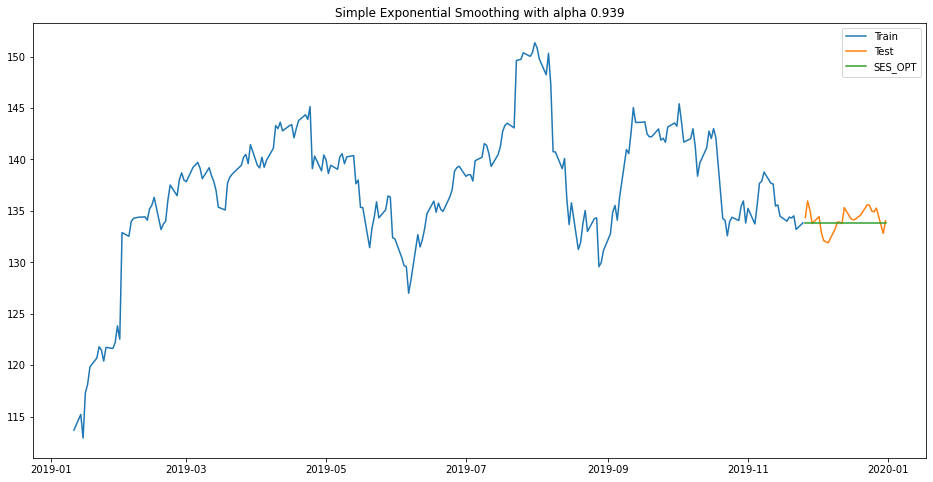

              227         228         229         230         231
Y_hat  133.805809  133.805809  133.805809  133.805809  133.805809
Y      134.339996  135.970001  135.089996  133.770004  134.449997


In [163]:
pred_opt   =  SimpleExpSmoothing(train['Close']).fit(optimized = True)
print('')
print('Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(pred_opt.params['smoothing_level'], 4))
print('Initial Level',   np.round(pred_opt.params['initial_level'], 4))
print('')

y_pred_opt           = pred_opt.forecast(steps = 26)
df_pred_opt          = pd.DataFrame({'Y_hat':y_pred_opt,'Y':test['Close'].values})

rmse_opt             =  np.sqrt(mean_squared_error(test['Close'], y_pred_opt))

alpha_value          = np.round(pred_opt.params['smoothing_level'], 4)

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

plt.figure(figsize=(16,8))
plt.plot(train.TimeIndex, train['Close'], label = 'Train')
plt.plot(test.TimeIndex, test['Close'],  label = 'Test')
plt.plot(test.TimeIndex, y_pred_opt,           label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

print(df_pred_opt.head().T)

# **Holt’s Method**

In [164]:
from   statsmodels.tsa.holtwinters import  Holt
model_holt = Holt(np.asarray(train['Close']))

model_fit = model_holt.fit()

print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.9367
Initial Level 113.6647



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [165]:
Pred_Holt = test.copy()

Pred_Holt['Opt'] = model_fit.forecast(len(test['Close']))

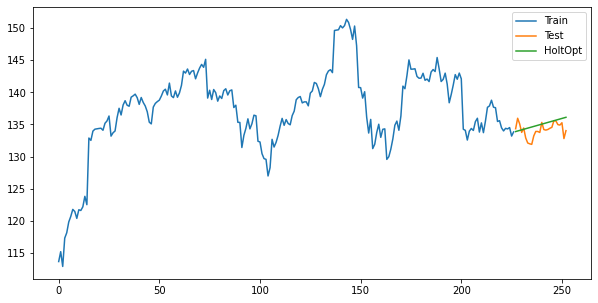

In [166]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(Pred_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [167]:
df_pred_opt =  pd.DataFrame({'Y_hat':Pred_Holt['Opt'] ,'Y':test['Close'].values})
rmse_opt =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

For alpha = 0.94,  RMSE is 1.4363 


# **Holt-Winters’ Method**

In [168]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

pred1 = ExponentialSmoothing(np.asarray(train['Close']), trend='additive', damped_trend=False, seasonal='additive',
                                  seasonal_periods = 74).fit()
alpha_value = np.round(pred1.params['smoothing_level'], 4)
### Forecast for next 16 months

y_pred1 =  pred1.forecast(steps = 26)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Close']})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


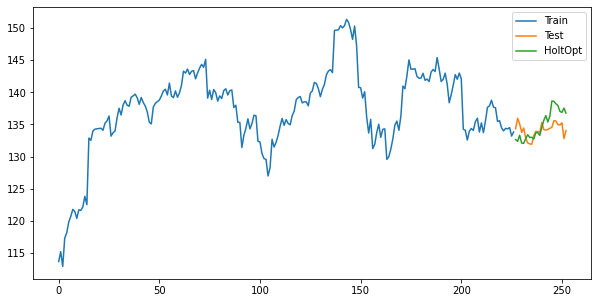

In [169]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_pred1.Y_hat, label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [170]:
rmse =  np.sqrt(mean_squared_error(df_pred1.Y, df_pred1.Y_hat))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))

For alpha = 0.90,  RMSE is 2.1764 
